<a href="https://colab.research.google.com/github/NihaShaji/Event-Planner/blob/main/Detection_of_Phishing_websites.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


import os
for dirname, _, filenames in os.walk('/content/dataset_phishing.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

<ipython-input-1-3507010399b3>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
import warnings


from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.svm import SVC
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
data=pd.read_csv('/content/dataset_phishing.csv')
data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [ ]:
null_values = data.isnull().sum()
print(null_values)

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64


In [ ]:
#Encoding 'status' as label 1 & 0 , naming the field as target
data['target'] = pd.get_dummies(data['status'])['legitimate'].astype('int')
data.drop('status',axis = 1, inplace=True)
data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,target
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,1
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,0
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,0
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,1
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,1


In [ ]:
from sklearn.model_selection import train_test_split
X = data.copy()

y = X.pop('target')
#X = data.drop(columns=['url','target','nb_underscore','nb_or','sfh','punycode'])
X = data.drop(columns=['url','target'])



# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)
X_train = np.expand_dims(X_train, axis=2)
X_valid = np.expand_dims(X_valid, axis=2)

input_shape = [X_train[1].shape]
print("Input shape is ", input_shape)

print(X_train.shape)
print(X_train)

Input shape is  [(87, 1)]
(8572, 87, 1)
[[[45.]
  [22.]
  [ 0.]
  ...
  [ 0.]
  [ 1.]
  [ 0.]]

 [[72.]
  [ 9.]
  [ 0.]
  ...
  [ 0.]
  [ 1.]
  [ 2.]]

 [[41.]
  [13.]
  [ 0.]
  ...
  [ 0.]
  [ 0.]
  [ 3.]]

 ...

 [[49.]
  [15.]
  [ 0.]
  ...
  [ 0.]
  [ 0.]
  [ 3.]]

 [[26.]
  [17.]
  [ 0.]
  ...
  [ 0.]
  [ 0.]
  [ 8.]]

 [[68.]
  [24.]
  [ 0.]
  ...
  [ 0.]
  [ 0.]
  [ 5.]]]


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.BatchNormalization(input_shape=(87, 1)),
    layers.LSTM(128, return_sequences=True),
    layers.BatchNormalization(),
    #layers.Conv1D(filters=32,kernel_size=3,activation='relu'),
    #layers.BatchNormalization(),
    #layers.MaxPooling1D(pool_size=2) ,
    layers.Dropout(0.3),

 layers.LSTM(64, return_sequences=False),
    layers.Dropout(0.3),
    #layers.Flatten(), # flatten out the layers
    layers.Dense(512,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 87, 1)             4         
 Normalization)                                                  
                                                                 
 lstm (LSTM)                 (None, 87, 128)           66560     
                                                                 
 batch_normalization_1 (Bat  (None, 87, 128)           512       
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 87, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.0001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=128,
    epochs=20000,
    callbacks=[early_stopping],
)

Epoch 1/20000
67/67 [==============================] - 39s 487ms/step - loss: 0.7506 - binary_accuracy: 0.6568 - val_loss: 0.7257 - val_binary_accuracy: 0.5000
Epoch 2/20000
67/67 [==============================] - 31s 457ms/step - loss: 0.6701 - binary_accuracy: 0.6858 - val_loss: 0.7572 - val_binary_accuracy: 0.5000
Epoch 3/20000
67/67 [==============================] - 29s 440ms/step - loss: 0.6500 - binary_accuracy: 0.6858 - val_loss: 0.7476 - val_binary_accuracy: 0.5000
Epoch 4/20000
67/67 [==============================] - 32s 482ms/step - loss: 0.6182 - binary_accuracy: 0.7061 - val_loss: 0.7958 - val_binary_accuracy: 0.5000
Epoch 5/20000
67/67 [==============================] - 28s 419ms/step - loss: 0.6115 - binary_accuracy: 0.7084 - val_loss: 0.7108 - val_binary_accuracy: 0.5000
Epoch 6/20000
67/67 [==============================] - 30s 455ms/step - loss: 0.5977 - binary_accuracy: 0.7074 - val_loss: 0.6888 - val_binary_accuracy: 0.5000
Epoch 7/20000
67/67 [===================

Best Validation Loss: 0.5497
Best Validation Accuracy: 0.7530


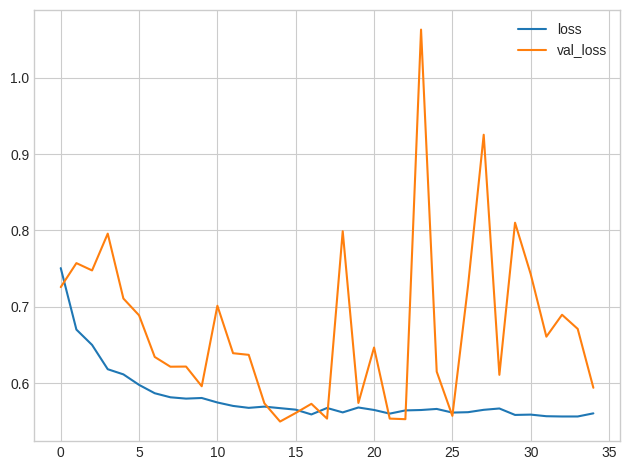

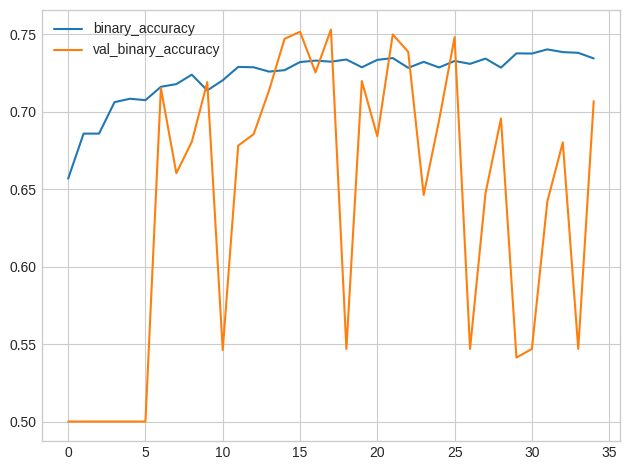

In [ ]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 0
history_df.loc[0:, ['loss', 'val_loss']].plot()
history_df.loc[0:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_binary_accuracy'].max()))

DECISION TREE

In [ ]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y,
                                                    test_size = 0.25, random_state = 12)
X_train1.shape, X_test1.shape

NameError: name 'X' is not defined

In [ ]:
#importing packages
from sklearn.metrics import accuracy_score

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [ ]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model
tree.fit(X_train1, y_train1)

DecisionTreeClassifier(max_depth=5)

In [ ]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test1)
y_train_tree = tree.predict(X_train1)

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train1,y_train_tree)
acc_test_tree = accuracy_score(y_test1,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.939
Decision Tree: Accuracy on test Data: 0.929


RESULTS

In [ ]:
acc_train_tree

0.9363517060367454

In [ ]:
lstm_acc = history_df['val_binary_accuracy'].max()

In [ ]:
lstm_acc

0.7529740929603577

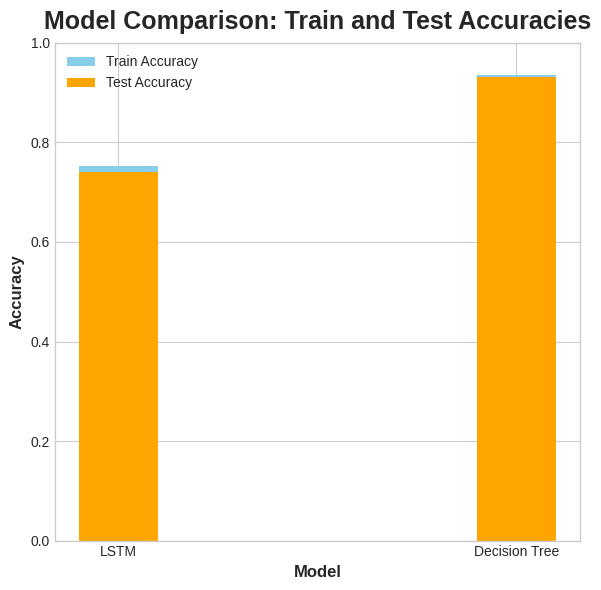

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['LSTM', 'Decision Tree']
accuracies_train = [lstm_acc, acc_train_tree]
accuracies_test = [history_df['binary_accuracy'].max(), acc_test_tree]

# Plot
plt.figure(figsize=(6, 6))
plt.bar(models, accuracies_train, color='skyblue', label='Train Accuracy',width=0.2)
plt.bar(models, accuracies_test, color='orange', label='Test Accuracy',width=0.2)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Train and Test Accuracies')
plt.legend()
plt.ylim(0, 1)  # Limiting y-axis from 0 to 1 for better visualization of accuracy
plt.show()

In [ ]:
 history_df['binary_accuracy'].max()

0.7402006387710571

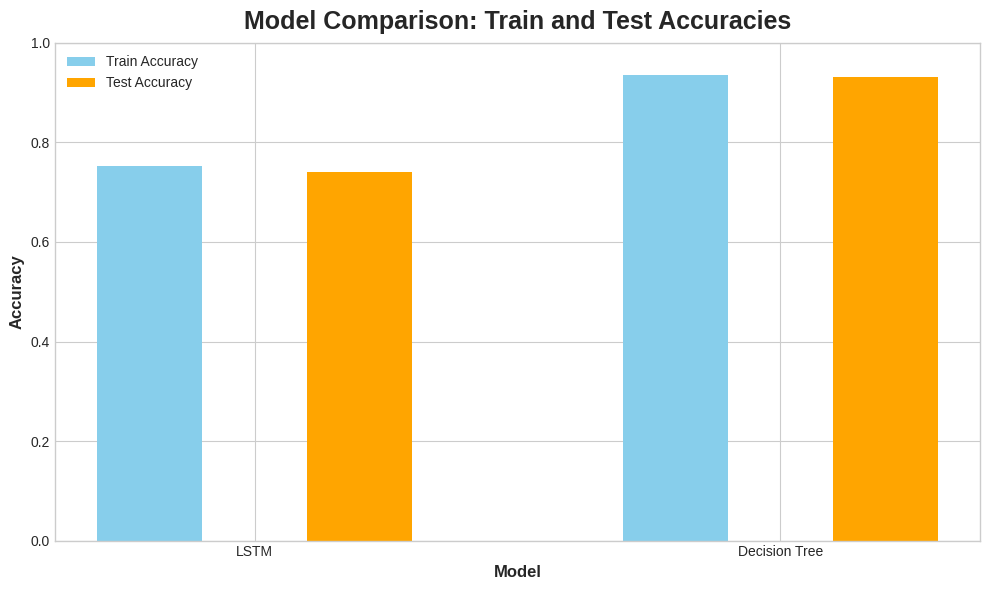

In [ ]:
import numpy as np  # Import numpy for array manipulation

# Data
models = ['LSTM', 'Decision Tree']
accuracies_train = [lstm_acc, acc_train_tree]
accuracies_test = [history_df['binary_accuracy'].max(), acc_test_tree]

# Define the x-axis positions for the bars
x_train = np.arange(len(models)) - 0.2  # Shift bars slightly to the left
x_test = np.arange(len(models)) + 0.2   # Shift bars slightly to the right

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x_train, accuracies_train, color='skyblue', label='Train Accuracy', width=0.2)  # Use adjusted x-coordinate
plt.bar(x_test, accuracies_test, color='orange', label='Test Accuracy', width=0.2)       # Use adjusted x-coordinate
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Train and Test Accuracies')
plt.xticks(np.arange(len(models)), models)  # Set x-axis labels
plt.legend()
plt.ylim(0, 1)  # Limiting y-axis from 0 to 1 for better visualization of accuracy
plt.show()
